<a href="https://colab.research.google.com/github/PeterSlakhorst/colab_jupyter/blob/master/returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calculate log return in numpy and pandas**

In [0]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

In [0]:
# create pandas dateframe from scratch

symbol = ['ASTOCK']*8
prices = pd.Series([100, 105, 107, 107, 105, 109, 110, 120])
t = pd.date_range(start='1/1/2018', end='1/08/2018')
s = pd.Series(symbol)

frame = { 'Date': t, 'Ticker': s, 'Price': prices} 
  
result = pd.DataFrame(frame)
result = result.set_index('Date')

In [0]:
result['Return']= result['Price'].pct_change()
result['Log Return'] = np.log(result['Price']/result['Price'].shift(1))

In [0]:
print("Het gemiddelde van de log returns is:",  result.Price.mean())
result


Het gemiddelde van de log returns is: 107.875


,Ticker,Price,Return,Log Return
Date,,,,
2018-01-01,ASTOCK,100,NaN,NaN
2018-01-02,ASTOCK,105,0.050000,0.048790
2018-01-03,ASTOCK,107,0.019048,0.018868
2018-01-04,ASTOCK,107,0.000000,0.000000
2018-01-05,ASTOCK,105,-0.018692,-0.018868
2018-01-06,ASTOCK,109,0.038095,0.037388
2018-01-07,ASTOCK,110,0.009174,0.009132
2018-01-08,ASTOCK,120,0.090909,0.087011


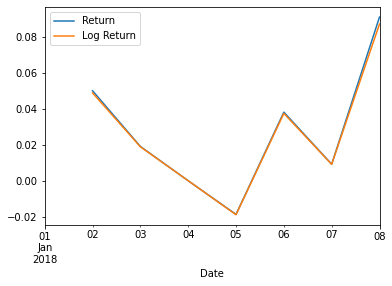

In [0]:
result[['Return', "Log Return"]].plot();

#  Lees csv-file from google drive

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

my_drive_path = "/content/drive/My Drive/Colab Notebooks/data/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks/data"

'Copy of PyfAT #1 LIVE.ipynb'   movie_lines.txt   prices.csv


In [0]:
file_name = 'prices.csv'
prices = pd.read_csv(my_drive_path+file_name, parse_dates=['date'])



In [0]:
#  add log return to the dataframe
prices['Log Return'] = np.log(prices['price']/prices['price'].shift(1))
prices.tail(10)

,price,date,ticker,Log Return
494,89.266358,2017-06-19,B,-0.003761
495,87.920671,2017-06-20,B,-0.015190
496,86.471224,2017-06-21,B,-0.016623
497,86.965300,2017-06-22,B,0.005698
498,85.980963,2017-06-23,B,-0.011383
499,85.293078,2017-06-26,B,-0.008033
500,86.521425,2017-06-27,B,0.014299
501,85.596974,2017-06-28,B,-0.010742
502,86.384999,2017-06-29,B,0.009164
503,87.479757,2017-06-30,B,0.012593


In [0]:
# calculate standard deviation (volatility) per ticker
prices.groupby('ticker').std()['Log Return']

ticker
A    0.006444
B    0.026721
Name: Log Return, dtype: float64

Read Microsoft data from csv

In [0]:
file_name = 'MSFT.csv'
# load stock data from csv
data = pd.read_csv(my_drive_path+file_name, parse_dates=["date"], index_col='date')
X = data['close']

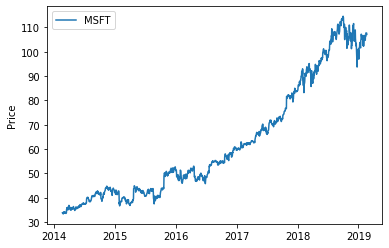

In [8]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

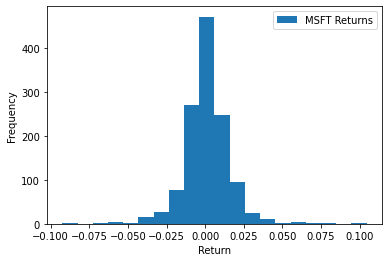

In [9]:
R = X.pct_change()[1:]   # drow the first value as this is NA
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

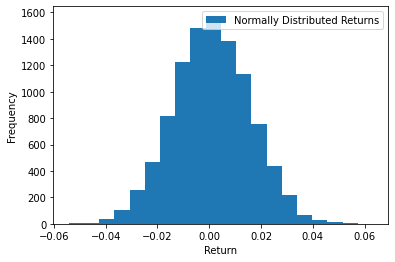

In [10]:

plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

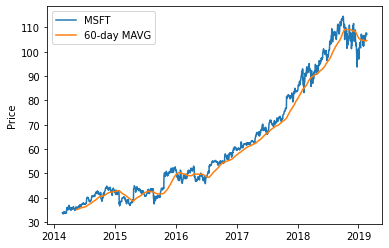

In [11]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

# Calculate Exponentially weigthed volatility

Estimate Volatility
Create an exponential moving average model of volatility. Use the following 

[link text](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html)

Pandas provides built-in exponentially weighted moving window functions with the .ewm method. Consider using .ewm().mean(), and be sure to properly specify the alpha parameter (hint: it is related to, but not equal to 
λ\lambda
λ). 
Note that .ewm().std() and .ewm().var() implement ewmvar(x) = ewma(x**2) - ewma(x)**2, which is slightly different than what you'll want to implement for this problem.


In [0]:
file_name = 'data.csv'
prices = pd.read_csv(my_drive_path+file_name, parse_dates=['date'], index_col='date', squeeze=True)
prices.head(10)

date
2013-07-02    558.460000
2013-07-03    556.617926
2013-07-05    558.441898
2013-07-08    556.181508
2013-07-09    558.742118
2013-07-10    556.714543
2013-07-11    556.501555
2013-07-12    557.766786
2013-07-15    551.049572
2013-07-16    554.834074
Name: price, dtype: float64

In [0]:
def estimate_volatility(prices, l):
    """Create an exponential moving average model of the volatility of a stock
    price, and return the most recent (last) volatility estimate.
    
    Parameters
    ----------
    prices : pandas.Series
        A series of adjusted closing prices for a stock.
        
    l : float
        The 'lambda' parameter of the exponential moving average model. Making
        this value smaller will cause the model to weight older terms less 
        relative to more recent terms.
        
    Returns
    -------
    last_vol : float
        The last element of your exponential moving averge volatility model series.
    
    """
    # TODO: Implement the exponential moving average volatility model and return the last value.
    
    pass

,price,date
0,558.460000,2013-07-02
1,556.617926,2013-07-03
2,558.441898,2013-07-05
3,556.181508,2013-07-08
4,558.742118,2013-07-09
5,556.714543,2013-07-10
6,556.501555,2013-07-11
7,557.766786,2013-07-12
8,551.049572,2013-07-15
9,554.834074,2013-07-16
